## 音声データの準備

ffmpegで音声データを編集する

* `.wav`: `-i`
* モノラル: `-ac`
* サンプリングレートを16000Hzにする: `-ar`

```sh
ffmpeg -i sample.wav -ac 1 -ar 16000 sample1.wav
```

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import librosa
import librosa.display

In [2]:
data, rate = librosa.load("../resources/sample.wav", sr=16000)
times = np.arange(data.shape[0]) / rate
(rate, data)

(16000, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

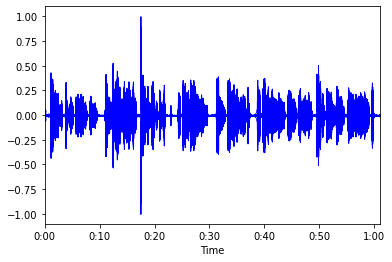

In [3]:
librosa.display.waveplot(data, sr=rate, color='blue')

In [4]:
# メルスペクトログラム
spectrogram = librosa.feature.melspectrogram(data, sr=rate)

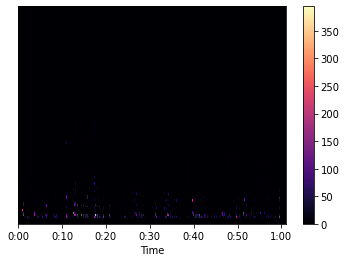

In [5]:
librosa.display.specshow(spectrogram, sr=rate, x_axis="time")
plt.colorbar()

In [6]:
# MFCC
mfccs = librosa.feature.mfcc(data, sr=rate)

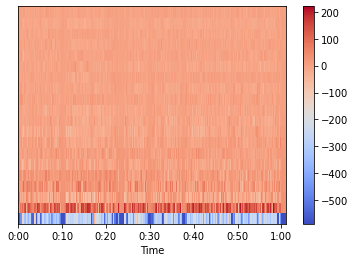

In [7]:
librosa.display.specshow(mfccs, sr=rate, x_axis="time")
plt.colorbar()

In [8]:
RATE = 16000
N_MFCC = 12
N_FFT = 1024
HOP_LENGHT = 256
N_MELS = 20


def mfcc(data: np.ndarray):
    feature = librosa.feature.mfcc(data, 
                                   RATE, 
                                   n_mfcc=N_MFCC, 
                                   n_fft=N_FFT,
                                   hop_length=HOP_LENGHT, 
                                   n_mels=N_MELS)

    return feature

In [9]:
def mfcc_stream(audio_data, hop_size):
    """マイク入力を想定しwhileループ"""
    
    n = audio_data.shape[0]
    i = 0
    while True:
        frame = audio_data[i:i+hop_size]
        print(frame.shape, frame.shape[0]/16000)
        
        yield mfcc(frame)
        
        i += hop_size
        if i >= n:
            break

(2048,) 0.128
(12, 9)


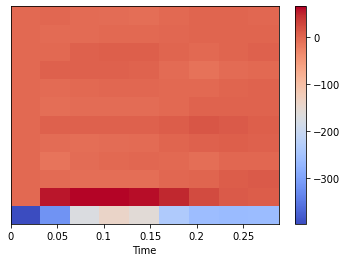

In [10]:
s = mfcc_stream(data, 2048)
frame = next(s)
print(frame.shape)
librosa.display.specshow(frame, sr=rate, x_axis="time")
plt.colorbar()